In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.applications.resnet50 import preprocess_input

from unsupcon_loss import get_aug_seq
from unsupcon_loss import sim, contrastive_loss

2021-12-02 13:58:17.948010: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-02 13:58:17.991161: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-02 13:58:17.991366: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-02 13:58:17.991993: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

(100, 32, 32, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


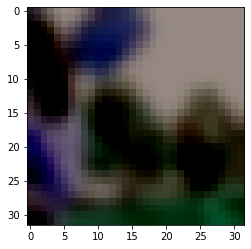

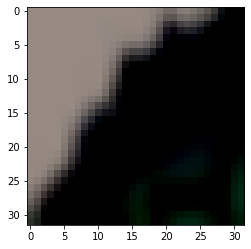

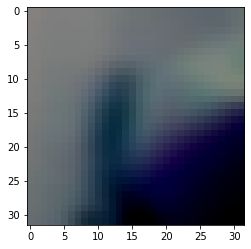

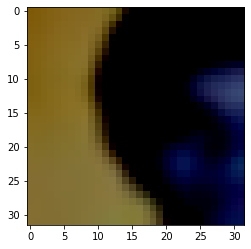

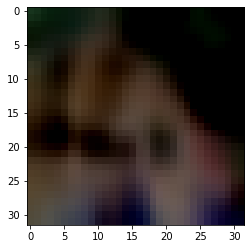

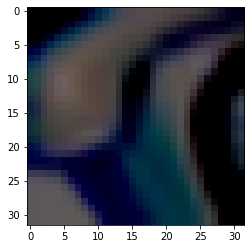

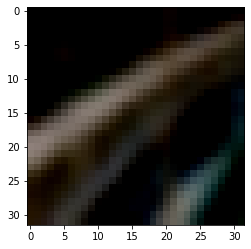

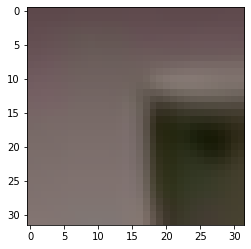

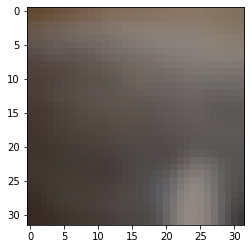

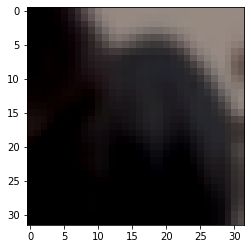

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar100.load_data()
X = X_train[:100]
X = preprocess_input(X)
X = tf.math.multiply(1./255, X)
print(np.shape(X))
N = 10
X_batches = tf.data.Dataset.from_tensor_slices(X).batch(N).take(1)
for batch in X_batches:
    aug_seq = get_aug_seq(np.size(X, 1), np.size(X, 2))
    batch = aug_seq(batch)
    for img in batch:
        plt.figure()
        plt.imshow(img)

In [3]:
for batch in X_batches:
    b_shape = tf.shape(batch)
    batch_l = tf.reshape(batch, (b_shape[0], b_shape[1] * b_shape[2], b_shape[3]))
    batch_z = tf.math.reduce_mean(batch_l, axis=2) #this is a bad encoding for demo purposes only
    print(tf.shape(batch_z))
    for k in range(N - 1):
        print(f"sim: {sim(batch_z[k], batch_z[k+1])}")
        print(f"unsupcon loss: {contrastive_loss(batch_z, k, k+1)}")

tf.Tensor([  10 1024], shape=(2,), dtype=int32)
sim: 0.37225183844566345
unsupcon loss: 2.092926502227783
sim: 0.63514643907547
unsupcon loss: 1.94914972782135
sim: 0.29549387097358704
unsupcon loss: 2.275639772415161
sim: -0.3635627329349518
unsupcon loss: 2.7900431156158447
sim: -0.06903401017189026
unsupcon loss: 2.1351659297943115
sim: 0.050763387233018875
unsupcon loss: 2.356156826019287
sim: -0.15494404733181
unsupcon loss: 2.2521300315856934
sim: 0.3408375382423401
unsupcon loss: 2.2623071670532227
sim: 0.10354868322610855
unsupcon loss: 2.316617250442505


(100, 32, 32, 3)


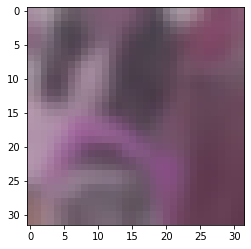

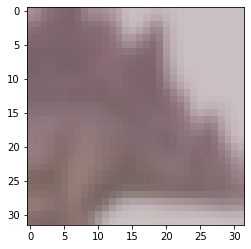

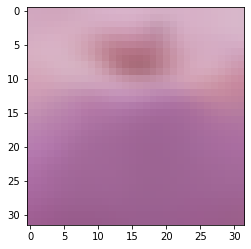

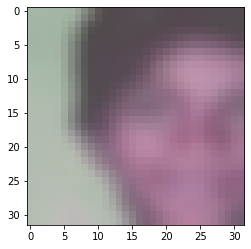

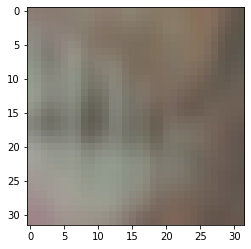

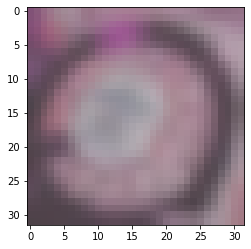

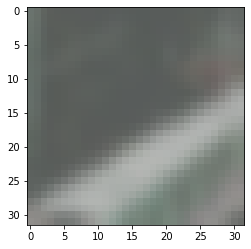

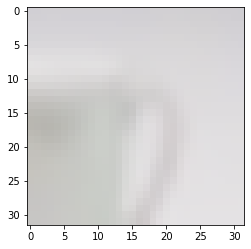

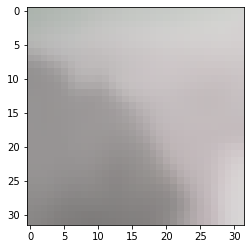

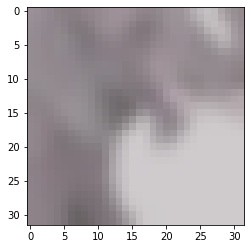

In [4]:
X = X_train[:100]
X = tf.math.multiply(1./255, X)
print(np.shape(X))
N = 10
X_batches = tf.data.Dataset.from_tensor_slices(X).batch(N).take(1)
for batch in X_batches:
    batch = aug_seq(batch)
    for img in batch:
        plt.figure()
        plt.imshow(img)

In [5]:
for batch in X_batches:
    b_shape = tf.shape(batch)
    batch_l = tf.reshape(batch, (b_shape[0], b_shape[1] * b_shape[2], b_shape[3]))
    batch_z = tf.math.reduce_mean(batch_l, axis=2) #this is a bad encoding for demo purposes only
    print(tf.shape(batch_z))
    for k in range(N - 1):
        print(f"sim: {sim(batch_z[k], batch_z[k+1])}")
        print(f"unsupcon loss: {contrastive_loss(batch_z, k, k+1)}")

tf.Tensor([  10 1024], shape=(2,), dtype=int32)
sim: 0.87171870470047
unsupcon loss: 2.1815834045410156
sim: 0.9135200381278992
unsupcon loss: 2.155482530593872
sim: 0.8373923897743225
unsupcon loss: 2.2391605377197266
sim: 0.7828384041786194
unsupcon loss: 2.2471179962158203
sim: 0.8509966135025024
unsupcon loss: 2.1949312686920166
sim: 0.8487433195114136
unsupcon loss: 2.1967554092407227
sim: 0.8966600298881531
unsupcon loss: 2.131559133529663
sim: 0.8893406391143799
unsupcon loss: 2.2171499729156494
sim: 0.8106147646903992
unsupcon loss: 2.238619804382324
